<a href="https://colab.research.google.com/github/humbletechy/258_Assignment_2/blob/main/Ankit_Garg_258_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import gdown
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from collections import defaultdict

In [65]:
df_business = pd.read_csv('/content/drive/MyDrive/CSE258/CA_businesses.csv')  
df_reviews = pd.read_csv('/content/drive/MyDrive/CSE258/CA_reviews.csv') 
df_tipdata = pd.read_csv('/content/drive/MyDrive/CSE258/CA_tipdata.csv') 
df_userdata = pd.read_csv('/content/drive/MyDrive/CSE258/CA_userdata.csv') 

In [66]:
df_business.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101.0,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,CA,93101.0,34.420209,-119.700460,3.0,24,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'..."
2,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101.0,34.414445,-119.690672,4.0,389,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': ""...","Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '..."
3,nUqrF-h9S7myCcvNDecOvw,Iron Horse Auto Body,825 Cacique St,Santa Barbara,CA,93103.0,34.419620,-119.677032,4.5,32,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Towing, Automotive, Body Shops","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."
4,bYjnX_J1bHZob10DoSFkqQ,Tinkle Belle Diaper Service,NaN,Santa Barbara,CA,93101.0,34.420334,-119.710749,5.0,17,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Parenting Classes, Maternity Wear, Fashion, Ed...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."


In [67]:
df_userdata.head(5)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
2,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1221,2005-03-14 20:26:35,14953,9940,11211,"2006,2007,2008,2009,2010,2011,2012,2013,2014","xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...",1357,...,163,191,361,147,1212,5696,2543,2543,815,323
3,iYzhPPqnrjJkg1JHZyMhzA,Chris,4,2010-11-03 18:59:20,1,0,1,NaN,"Vq4Pc81l6MWTnc-h41YE-Q, ArMLZPW4GljwhopfoQA-uw...",1,...,0,0,0,0,0,0,0,0,0,0
4,QF1Kuhs8iwLWANNZxebTow,Catherine,607,2009-04-27 20:25:54,4573,3714,4149,"2010,2011,2012,2013,2014,2015,2016,2017,2018,2...","dLts9bY66tXEFqYG03YFgw, SYDGMC7d5NnMiT1l_WQq5A...",131,...,79,68,29,23,144,407,808,808,587,723


In [68]:
df_userdata['friends'][0]

'NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA, EjlCGf14tYMPJ0rsrL703w, 7OagHIAKx2Rm9z3CQ0OmvA, uZoFvKs0dahfffIqHQf1eA, TW7-U8Y_SYsAX91Ol5LlfA, 6EDA76lfkaTyOeuxkg0Fmw, MsTKApUX1VF2Mv9jpUIG5g, Rq4TAwX8vj0Ccc3Pt0mJ5g, P77zKKIP9xyakKLRutvdAQ, pOqaU6X1xyWUoYJJdoqbBw, 1aU0r7X2luo9P8hfSpq6ng, 7XDyuBY0mhLsaGqjquh8rw, KrnJZsROH6jsiCN_RHG_8Q, 48zQrAJNOqcKJJgqU5WzbQ, 48wN4GpyJ7hPy4uuwpGFmw, z8zzFMKCnavBY5_-_vzi9w, BemKKkZBBmu9GupEwKBj9g, vVS0rY7uZ2UZ6bdsDzSPIQ, hc6-o0VhNPw3qR3Pv7Knmg, 2AOUvDvG7rvAX1hLI5QZKA, dKzMVnYh_tvIQbDm6pTlRA, ACHQbmN7OMTY6PFz5Sl4_g, 8hqS8Wul46dt370JVRA83Q, TMLVzNYs-zwwREudyvI08A, 36LgEtwt6ROhrCtuPjfRmQ, -f6amuvfIVS7VX65BqZ6pQ, kCjFwGXHxUTaJ23p70j86w, d9J7e2uo-a0S0XMuw1CS-A, dbrGVOcscXUQjQGi_0bnaQ, a_luWCTl-TLAgvsgfn8dfw, -cnGMlaftdo8HGVrQwKE3Q, p2ww1kRTv0z9dT3gZYcDkg, 3gE3_MDUsCg-Tay4t1R5nA, uJ2LwqzRgBf_klkVaXh4Ig, T_7gdLtmEvQgNGUoo9Wa4A, -_QbHsgT5VBnC0LCeiFhWg, exGR1gKBGqxO22d6bAiB1g, L_hkq91-wOSrI5wX1RU5og, cH8BtsTcwziAFTnAz7jjCg, FQCVWJV442bwSIbdUPPpDg, YerLN4IUmp_nX0s

In [69]:
df_userdata.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [70]:
# number of fans
df_userdata_user_ids = df_userdata['user_id'].to_list()
df_userdata_fans = df_userdata['fans'].to_list()

user_id_to_fan = {}

for i in range(0, len(df_userdata_user_ids)):
  user_id_to_fan[df_userdata_user_ids[i]] = [df_userdata_fans[i]]

def number_of_fans_lookup(id):
  return user_id_to_fan[id]

In [71]:
# number of useful
df_userdata_useful = df_userdata['useful'].to_list()

user_id_to_useful = {}

for i in range(0, len(df_userdata_user_ids)):
  user_id_to_useful[df_userdata_user_ids[i]] = [df_userdata_useful[i]]

def number_of_useful_lookup(id):
  return user_id_to_useful[id]

In [72]:
# number of funny
df_userdata_funny = df_userdata['funny'].to_list()

user_id_to_funny = {}

for i in range(0, len(df_userdata_user_ids)):
  user_id_to_funny[df_userdata_user_ids[i]] = [df_userdata_funny[i]]

def number_of_funny_lookup(id):
  return user_id_to_funny[id]

In [73]:
# number of cool
df_userdata_cool = df_userdata['cool'].to_list()

user_id_to_cool = {}

for i in range(0, len(df_userdata_user_ids)):
  user_id_to_cool[df_userdata_user_ids[i]] = [df_userdata_cool[i]]

def number_of_cool_lookup(id):
  return user_id_to_cool[id]

In [74]:
# number of friends
df_userdata_friends = df_userdata['friends'].to_list()

user_id_to_num_friends = {}

for i in range(0, len(df_userdata_user_ids)):
  user_id_to_num_friends[df_userdata_user_ids[i]] = [len(df_userdata_friends[i].split(", "))]

def number_of_friends_lookup(id):
  return user_id_to_num_friends[id]

In [83]:
# average rating of friends
df_userdata_friends = df_userdata['friends'].to_list()
df_userdata_rating = df_userdata['average_stars'].to_list()
df_userdata_friends_rating = {}

user_id_to_rating = {}

for i in range(0, len(df_userdata_user_ids)):
  user_id_to_rating[df_userdata_user_ids[i]] = df_userdata_rating[i]

for i in range(0, len(df_userdata_user_ids)):
  friend_list = df_userdata_friends[i].split(", ")
  total_stars = 0
  count = 0

  for friend in friend_list:
    if friend in user_id_to_rating.keys():
      total_stars += user_id_to_rating[friend]
      count += 1

  if (count != 0):
    df_userdata_friends_rating[df_userdata_user_ids[i]] = total_stars/count
  else:
    df_userdata_friends_rating[df_userdata_user_ids[i]] = 0

def friends_rating_lookup(id):
  return df_userdata_friends_rating[id]

In [44]:
print(len(df_userdata_friends[0].split(", ")))

14995


In [7]:
df_reviews.head(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,ZKvDG2sBvHVdF5oBNUOpAQ,wSTuiTk-sKNdcFyprzZAjg,B5XSoSG3SfvQGtKEGQ1tSQ,3.0,1,1,0,This easter instead of going to Lopez Lake we ...,2016-03-30 22:46:33
1,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3.0,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06
2,eCiWBf1CJ0Zdv1uVarEhhw,OhECKhQEexFypOMY6kypRw,vC2qm1y3Au5czBtbhc-DNw,4.0,0,0,0,Yes this is the only sushi place in town. How...,2013-09-04 03:48:20
3,YbMyvlDA2W3Py5lTz8VK-A,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5.0,0,0,0,Great burgers fries and salad! Burgers have a...,2017-01-02 03:17:34
4,L0jv8c2FbpWSlfNC6bbUEA,bFPdtzu11Oi0f92EAcjqmg,IDtLPgUrqorrpqSLdfMhZQ,5.0,0,0,0,What a great addition to the Funk Zone! Grab ...,2016-10-13 22:50:47


In [15]:
# Year of review
review_timestamps = df_reviews['date'].tolist()
review_id = df_reviews['review_id'].to_list()
review_years = [((int)(a[:4])) for a in review_timestamps]
review_year_vector = {}

for i in range(0, len(review_years)):
  one_hot_vector = [0]*18
  one_hot_vector[review_years[i]-2005] = 1
  review_year_vector[review_id[i]] = one_hot_vector

# size of feature vector - 18
def year_feature_lookup(id):
  return review_year_vector[id]

In [24]:
# Month of review
review_months = [((int)(a[5:7])) for a in review_timestamps]
review_month_vector = {}

for i in range(0, len(review_months)):
  one_hot_vector = [0]*4
  one_hot_vector[(int)((review_months[i]-1)/3)] = 1
  review_month_vector[review_id[i]] = one_hot_vector

# size of feature vector - 4
def month_feature_lookup(id):
  return review_month_vector[id]

1
12


[1, 0, 0, 0]
[0, 0, 1, 0]
[0, 0, 1, 0]
[1, 0, 0, 0]


In [20]:
print(review_timestamps[:5])

['2016-03-30 22:46:33', '2016-07-25 07:31:06', '2013-09-04 03:48:20', '2017-01-02 03:17:34', '2016-10-13 22:50:47']


In [9]:
# star rating distribution
# average length of review vs star rating
# top k words visualization
# number of reviews over different periods of the day
# number of reviews over different years
# useful/funny/cool vs length of text
# useful/funny/cool vs average star rating
# average star rating over different periods of the day

# average star rating/useful/funny/cool over different period of the day
# top k words vs business category, word cloud
# sentiment of reviews - pretrained model

# To - do
# Category Wise review count
# 

df_reviews.head(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,ZKvDG2sBvHVdF5oBNUOpAQ,wSTuiTk-sKNdcFyprzZAjg,B5XSoSG3SfvQGtKEGQ1tSQ,3.0,1,1,0,This easter instead of going to Lopez Lake we ...,2016-03-30 22:46:33
1,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3.0,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06
2,eCiWBf1CJ0Zdv1uVarEhhw,OhECKhQEexFypOMY6kypRw,vC2qm1y3Au5czBtbhc-DNw,4.0,0,0,0,Yes this is the only sushi place in town. How...,2013-09-04 03:48:20
3,YbMyvlDA2W3Py5lTz8VK-A,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5.0,0,0,0,Great burgers fries and salad! Burgers have a...,2017-01-02 03:17:34
4,L0jv8c2FbpWSlfNC6bbUEA,bFPdtzu11Oi0f92EAcjqmg,IDtLPgUrqorrpqSLdfMhZQ,5.0,0,0,0,What a great addition to the Funk Zone! Grab ...,2016-10-13 22:50:47


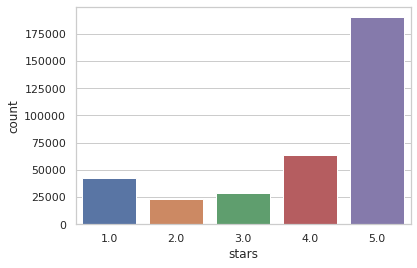

In [10]:
# star rating distribution
sns.set_theme(style="whitegrid")
sns.countplot(x=df_reviews["stars"])

Average review length is: 535.22
Average number of words per review: 98.31


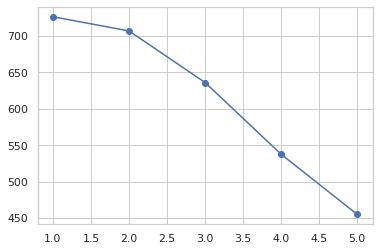

In [11]:
# Star rating
x = []
# Length of review
y = []

col_one_list = df_reviews['text'].tolist()
col_two_list = df_reviews['stars'].to_list()

total_length = 0
count = 0
total_words = 0
dct = defaultdict(list)

for i in range(0, len(col_one_list)):
  total_length += len(col_one_list[i])
  total_words += len(col_one_list[i].split())
  count += 1
  dct[col_two_list[i]].append(len(col_one_list[i]))

for i in range(0, 5):

  x.append(i+1)
  y.append(sum(dct[i+1])/len(dct[i+1]))

average_length = total_length/count
average_number_of_words_per_review = total_words/count


print(f'Average review length is: {average_length:.2f}')
print(f'Average number of words per review: {average_number_of_words_per_review:.2f}')

plt.scatter(x, y)
plt.plot(x, y)

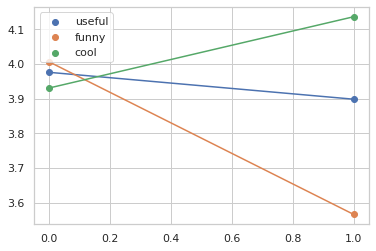

In [12]:
# Average Star Rating vs Usefulness/Funniness/Cool
def plot_useful_funny_cool_avg_star(col_name):
  x = [0, 1]
  # Average Length
  y = []

  col_one_list = df_reviews['stars'].tolist()
  col_two_list = df_reviews[col_name].to_list()

  rating0 = 0
  count0 = 0
  rating1 = 0
  count1 = 0
  total_words = 0
  dct = defaultdict(list)

  for i in range(0, len(col_one_list)):
    if (col_two_list[i] == 1):
      rating1 += col_one_list[i]
      count1 += 1
    else:
      rating0 += col_one_list[i]
      count0 += 1

  y = [rating0/count0, rating1/count1]

  plt.scatter(x, y, label=col_name)
  plt.legend(loc="upper left")
  plt.plot(x, y)

plot_useful_funny_cool_avg_star("useful")
plot_useful_funny_cool_avg_star("funny")
plot_useful_funny_cool_avg_star("cool")

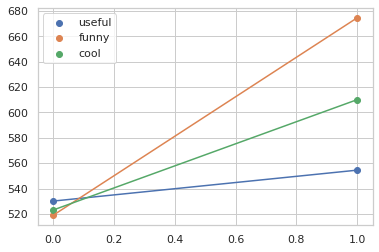

In [13]:
# Average Length vs Usefulness/Funniness/Cool
def plot_useful_funny_cool_avg_length(col_name):
  x = [0, 1]
  # Average Length
  y = []

  col_one_list = df_reviews['text'].tolist()
  col_two_list = df_reviews[col_name].to_list()

  length0 = 0
  count0 = 0
  length1 = 0
  count1 = 0
  total_words = 0
  dct = defaultdict(list)

  for i in range(0, len(col_one_list)):
    if (col_two_list[i] == 1):
      length1 += len(col_one_list[i])
      count1 += 1
    else:
      length0 += len(col_one_list[i])
      count0 += 1

  y = [length0/count0, length1/count1]

  plt.scatter(x, y, label=col_name)
  plt.legend(loc="upper left")
  plt.plot(x, y)

plot_useful_funny_cool_avg_length("useful")
plot_useful_funny_cool_avg_length("funny")
plot_useful_funny_cool_avg_length("cool")

In [14]:
wordId = {}
IdToWord = {}
wordCount = {}

for i in range(0, len(col_one_list)):
  words = col_one_list[i].split()
  for word in words:
    if word not in wordId.keys():
      ind = len(wordId.keys())
      wordId[word] = ind
      IdToWord[ind] = word

    wordCount[word] = wordCount.get(word, 0) + 1

wordFreqListId = []

for word in wordCount.keys():
  wordFreqListId.append((wordCount[word], wordId[word]))

wordFreqListId.sort(reverse=True)
wordFreqList = []

for i in range (0, len(wordFreqListId)):
  
  wordFreqList.append((wordFreqListId[i][0], IdToWord[wordFreqListId[i][1]]))

print(wordFreqList[:1000])

[(1403083, 'the'), (1248807, 'and'), (844960, 'a'), (813512, 'to'), (800162, 'I'), (601726, 'was'), (473018, 'of'), (400355, 'is'), (390485, 'for'), (375173, 'in'), (296012, 'The'), (285984, 'with'), (281263, 'it'), (260090, 'my'), (252112, 'that'), (227185, 'on'), (219369, 'but'), (195963, 'you'), (194419, 'have'), (193424, 'this'), (191903, 'we'), (191316, 'had'), (188211, 'were'), (180520, 'they'), (166664, 'are'), (162495, 'not'), (161483, 'so'), (158167, 'at'), (133998, 'be'), (129959, 'We'), (123466, 'our'), (121773, 'as'), (121736, 'very'), (121451, 'place'), (116004, 'food'), (109664, 'me'), (103066, 'great'), (102157, 'good'), (97897, 'all'), (94073, 'out'), (92577, 'from'), (91134, 'just'), (90242, 'like'), (88667, 'their'), (88085, 'an'), (87121, 'get'), (85850, 'here'), (83505, 'would'), (80787, 'or'), (80433, 'time'), (80257, 'up'), (80021, 'there'), (79174, 'one'), (77782, 'if'), (75932, 'service'), (75680, 'about'), (73820, 'They'), (73515, 'really'), (71206, 'when'), (7

In [15]:
# Number of unique words
print(f"Number of unique words: {len(wordFreqList)}")

Number of unique words: 465401


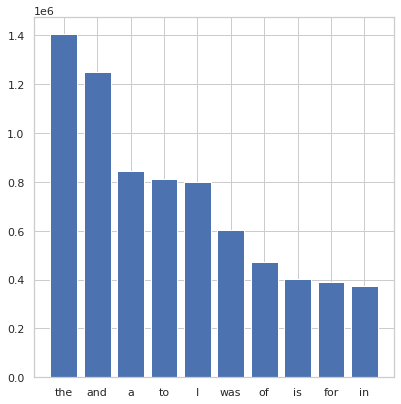

In [16]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
# langs = ['C', 'C++', 'Java', 'Python', 'PHP']
langs = [a[1] for a in wordFreqList[0:10]]
# students = [23,17,35,29,12]
students = [a[0] for a in wordFreqList[0:10]]
ax.bar(langs,students)
plt.show()

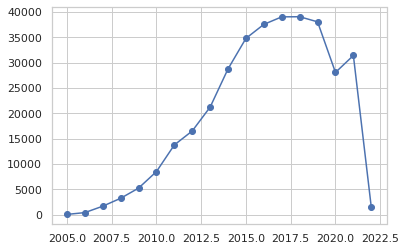

In [17]:
# Number of reviews year wise

time_stamps = df_reviews['date'].to_list()

years = [((int)(time[:4])) for time in time_stamps]

yearWiseReviewCount = {}

x = []
y = []

for ye in years:
  prev_count = yearWiseReviewCount.get(ye, 0)
  yearWiseReviewCount[ye] = prev_count + 1

for ye in sorted(yearWiseReviewCount.keys()):
  x.append(ye)
  y.append(yearWiseReviewCount[ye])

plt.plot(x, y)
plt.scatter(x, y)

In [18]:
print(time_stamps[:5])

['2016-03-30 22:46:33', '2016-07-25 07:31:06', '2013-09-04 03:48:20', '2017-01-02 03:17:34', '2016-10-13 22:50:47']


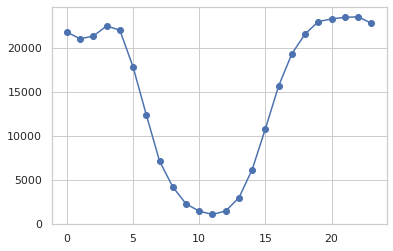

In [19]:
# Number of reviews hour wise

hour = []

for i in range (0, len(time_stamps)):

  hour.append(((int)(time_stamps[i][11:13])))

count = {}

for i in range(0, len(hour)):

  bin = (int)(hour[i]/1)
  prev_count = count.get(bin, 0)
  count[bin] = 1 + prev_count

x = []
y = []

for i in range(0, 24):
  x.append(i)
  y.append(count.get(i, 0))

plt.plot(x, y)
plt.scatter(x, y)


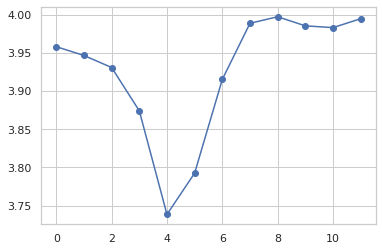

In [20]:
# Average Star Rating Hour Wise

hour = []

for i in range (0, len(time_stamps)):

  hour.append(((int)(time_stamps[i][11:13])))

count = defaultdict(list)
col_one_list = df_reviews['stars'].tolist()

for i in range(0, len(hour)):

  bin = (int)(hour[i]/2)
  count[bin].append(col_one_list[i])

x = []
y = []

for i in range(0, 12):
  x.append(i)
  y.append(sum(count[i])/len(count[i]))

plt.plot(x, y)
plt.scatter(x, y)

In [21]:
categories_listed = ['Restaurants', 'Shopping', 'Food', 'Home Services', 
                        'Health & Medical', 'Event Planning & Services', 
                        'Local Services', 'Beauty & Spas', 'Active Life', 
                        'Automotive', 'Nightlife', 'Hotels & Travel', 'Bars', 
                        'Arts & Entertainment', 'Professional Services', 'Fashion',
                        'Doctors', 'Home & Garden', 'American (New)', 'Mexican', 
                        'Coffee & Tea', 'Hair Salons', 'Sandwiches', 'Breakfast & Brunch', 
                        'Real Estate', 'Auto Repair', 'Fitness & Instruction', 'Others']

In [22]:
df_reviews.head(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,ZKvDG2sBvHVdF5oBNUOpAQ,wSTuiTk-sKNdcFyprzZAjg,B5XSoSG3SfvQGtKEGQ1tSQ,3.0,1,1,0,This easter instead of going to Lopez Lake we ...,2016-03-30 22:46:33
1,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3.0,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06
2,eCiWBf1CJ0Zdv1uVarEhhw,OhECKhQEexFypOMY6kypRw,vC2qm1y3Au5czBtbhc-DNw,4.0,0,0,0,Yes this is the only sushi place in town. How...,2013-09-04 03:48:20
3,YbMyvlDA2W3Py5lTz8VK-A,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5.0,0,0,0,Great burgers fries and salad! Burgers have a...,2017-01-02 03:17:34
4,L0jv8c2FbpWSlfNC6bbUEA,bFPdtzu11Oi0f92EAcjqmg,IDtLPgUrqorrpqSLdfMhZQ,5.0,0,0,0,What a great addition to the Funk Zone! Grab ...,2016-10-13 22:50:47


In [23]:
df_business.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101.0,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,CA,93101.0,34.420209,-119.700460,3.0,24,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'..."
2,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101.0,34.414445,-119.690672,4.0,389,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': ""...","Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '..."
3,nUqrF-h9S7myCcvNDecOvw,Iron Horse Auto Body,825 Cacique St,Santa Barbara,CA,93103.0,34.419620,-119.677032,4.5,32,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Towing, Automotive, Body Shops","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."
4,bYjnX_J1bHZob10DoSFkqQ,Tinkle Belle Diaper Service,NaN,Santa Barbara,CA,93101.0,34.420334,-119.710749,5.0,17,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Parenting Classes, Maternity Wear, Fashion, Ed...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."


In [27]:
catergories = df_business['categories'].to_list()
business_id = df_business['business_id'].to_list()

In [32]:
print(type(catergories[0]))

<class 'str'>


In [28]:
b_to_category = {}
for i in range(len(business_id)):
  b_to_category[business_id[i]] = catergories[i]

In [33]:
print(b_to_category.keys())

dict_keys(['Pns2l4eNsfO8kk83dixA6A', 'noByYNtDLQAra9ccqxdfDw', 'IDtLPgUrqorrpqSLdfMhZQ', 'nUqrF-h9S7myCcvNDecOvw', 'bYjnX_J1bHZob10DoSFkqQ', 'SZU9c8V2GuREDN5KgyHFJw', 'QZU7TcrztBb3tXaPbVCkXg', '25Uww0C0wvF9CZ_3B6vWtA', 'xF9r1XbMvEOsJeHlmFhIvw', '4xhGQGdGqU60BIznBjqnuA', 'Rad7bl6MFOEemh41CdREMQ', 'ifjluUv4VASwmFqEp8cWlQ', 'VeFfrEZ4iWaecrQg6Eq4cg', '4pS7qnjJ7_DCoJB-Enl7KA', 'X7FQ5k29A_RRYep7TOfjtw', 'bdfZdB2MTXlT6-RBjSIpQg', 'VEbHYioBfoPiIOWntE_DBA', 'xwSWtJcQkzTF6HNm_IMgcg', '82suwumWp1MEq04QhiS9DQ', 'uHprVoxTV7CwKJdaEEf3aA', '-kY_HDP7IMvGl-kBIZVU4A', '18eWJFJbXyR9j_5xfcRLYA', '6jomGWEI4ryImrWPguUQQQ', 'Ed7RUOj9MTUf9U-Y73bYlw', 'VeIrgRMOK_0ZToziUd2kUA', 'BkmVHg6HjHWMc0OFxcd6VQ', 'Jb1MlURq6ItKZ244tyoirA', 'B5XSoSG3SfvQGtKEGQ1tSQ', 'vLT1KtrA9bWvjFOg-0xVIg', '-ujBP1Dw0j1-Ffaz97-LXQ', 'wYROX7rw9fkQrWUS2YyY9g', 'BMTtMWDR3zcR5T30GFDoXQ', 'kHOXo-IZSpixpctmHsGlyA', 'dFEyk7Si7R-CHCMbxx3oJg', 'UFpCraqzFBAhtZqmxmiWsA', 'rQQPHtz05Y4hnDxY6kljFw', 'Hqz96v1ymucUKNzIWfEKXw', 'JWFpjvCc_nkNDVtMPx1ZGg', '

In [41]:
business_id_df_reviews = df_reviews['business_id'].to_list()
category_wise_reviews = defaultdict(int)

for i in range (0, len(business_id_df_reviews)):
  print(business_id_df_reviews[i])
  category_string = b_to_category[business_id_df_reviews[i]]
  print(category_string)
  categories_words = category_string.split(', ')
  for j in range(0, len(categories_words)):
    category_wise_reviews[categories_words[j]] += 1

Streaming output truncated to the last 5000 lines.
L7-PPe0fj-6U7qq31vjWnQ
Tapas/Small Plates, Beer Bar, Nightlife, Cocktail Bars, Bars, Food Delivery Services, Food, Restaurants
1oGCzoCC6HnQWpdK9cCP0g
Food, Coffee Roasteries, Coffee & Tea
mAqgsZBTN-wsShMpkz2o9g
Food, Breakfast & Brunch, Grocery, Sandwiches, Beer, Wine & Spirits, Meat Shops, Delis, Specialty Food, Restaurants, Health Markets
uEv1I-0r82Krj4eEysjC4A
Coffee & Tea, Food
LsFLAV2Sfq_DaRjDaI8LRA
Trainers, Fitness & Instruction, Active Life, Gyms
cJpbrSp_Jf0Ue9Tqqy1tBw
Shopping, Home & Garden, Appliances, Appliances & Repair, Local Services
VWOcF0yDILQfBuqjtPgNag
Real Estate, Home Services, Apartments
S4ujTsHtCOsHKrKkcjY30Q
French, American (New), Restaurants, Italian
Vn4ww0bYqyyR81eGSyhCEg
Pets, Veterinarians, Pet Services, Pet Groomers
COSC9JC0Vjr89CaTZuPkUA
Ramen, Japanese, Restaurants
92HeuR3hbRwGopK5zmmuag
Event Planning & Services, Hotels & Travel, Hotels
3fpAmsSuEFNF29UUPpgwlw
Restaurants, Bagels, Coffee & Tea, Food, Bub

AttributeError: ignored